In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('base_gastos_cartao.csv')
colunas = ["Gastos_Cartao", "Idade","Renda", "Impostos"]

In [2]:
df.isnull().any()

Gastos_Cartao    False
Idade            False
Renda            False
Impostos         False
Segmento         False
dtype: bool

In [3]:
(df  == 0).any()

Gastos_Cartao    False
Idade            False
Renda            False
Impostos         False
Segmento         False
dtype: bool

In [4]:
df.shape

(150, 5)

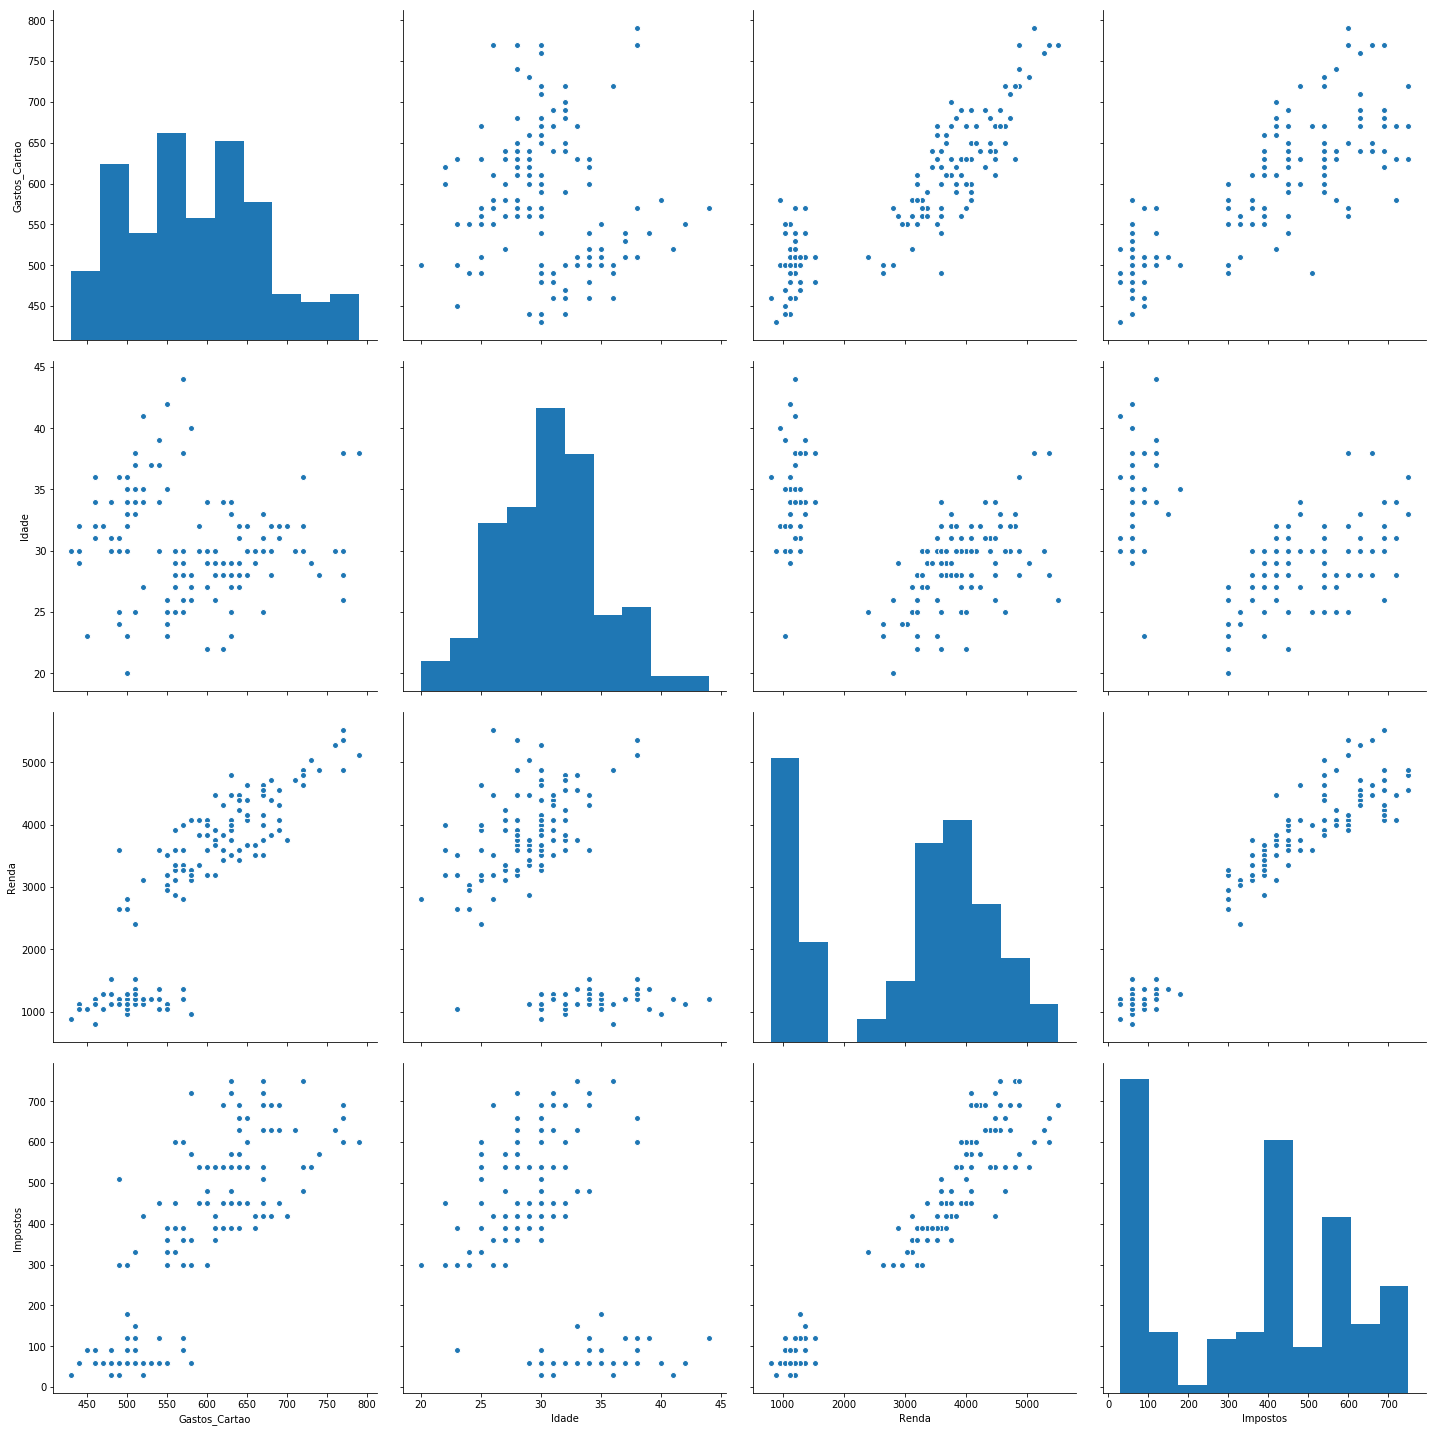

In [5]:
import seaborn as sb
sb.pairplot(df.dropna(), size=5,vars=colunas,kind='scatter')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train, df_val = train_test_split(df, test_size=0.3,random_state=432)

In [8]:
print(df_train.shape)
print(df_val.shape)

(105, 5)
(45, 5)


In [9]:
from sklearn.cluster import KMeans

225770600.91428572
32800627.928060416
12630833.71872082
6457239.472222221
4633330.994444445
3112955.3191622104
2404475.1954248366
1914730.0565359476
1561139.6093137255
1368697.0221925136


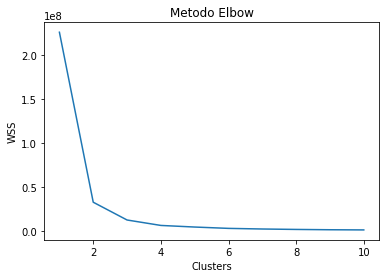

In [10]:
import matplotlib.pyplot as plt

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=432, n_init=100, init='k-means++')
    kmeans.fit(df_train[colunas])
    wcss.append(kmeans.inertia_)  
    print(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [11]:
km = KMeans(n_clusters=3, n_init=100, random_state=432, init='k-means++')

In [12]:
km.fit(df_train[colunas])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=432, tol=0.0001, verbose=0)

In [13]:
labels = km.predict(df_train[colunas])
print(labels)

[0 1 1 1 1 0 0 1 2 1 2 2 0 0 2 1 2 2 1 1 0 2 0 2 1 1 1 1 2 0 2 2 2 1 2 2 1
 2 2 1 2 1 0 0 2 0 1 2 0 0 2 1 0 0 2 1 0 0 1 0 0 1 0 0 0 1 2 1 1 2 2 1 1 1
 0 0 2 0 0 1 1 0 0 2 2 0 2 0 1 1 1 0 2 2 1 2 2 0 1 0 1 0 2 2 2]


In [14]:
centers = km.cluster_centers_
print(centers)

[[ 587.35294118   27.73529412 3416.47058824  411.17647059]
 [ 501.66666667   34.58333333 1155.55555556   73.33333333]
 [ 670.28571429   29.57142857 4505.14285714  594.85714286]]


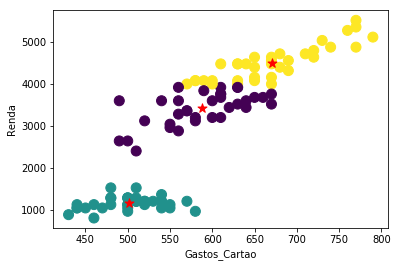

In [15]:
f1 = df_train['Gastos_Cartao'].values
f2 = df_train['Renda'].values

plt.scatter(f1, f2, c=labels, s=100)
plt.scatter(centers[:, 0], centers[:, 2], marker='*', c="red", s=90)
plt.xlabel('Gastos_Cartao')
plt.ylabel('Renda')
plt.show()

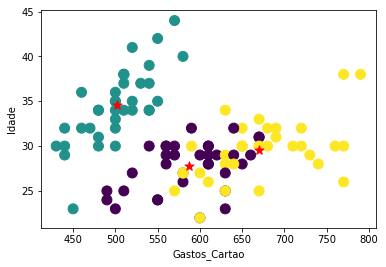

In [16]:
f1 = df_train['Gastos_Cartao'].values
f2 = df_train['Idade'].values

plt.scatter(f1, f2, c=labels, s=100)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c="red", s=90)
plt.xlabel('Gastos_Cartao')
plt.ylabel('Idade')
plt.show()

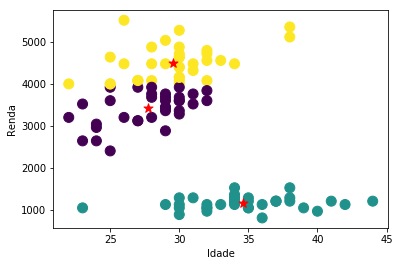

In [17]:
f1 = df_train['Idade'].values
f2 = df_train['Renda'].values

plt.scatter(f1, f2, c=labels, s=100)
plt.scatter(centers[:, 1], centers[:, 2], marker='*', c="red", s=90)
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

In [18]:
km.predict(df_val[colunas])

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1,
       0])